<a href="https://colab.research.google.com/github/harshitha188/Project/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction  of Presence of  Heart Disease in a person**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/heart (1).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

*** There are no missing values and all are numerical features  ***

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


*From the above table we can know the max,min,mean  of a column*

In [7]:
cor_matrix=df.corr()
cor_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


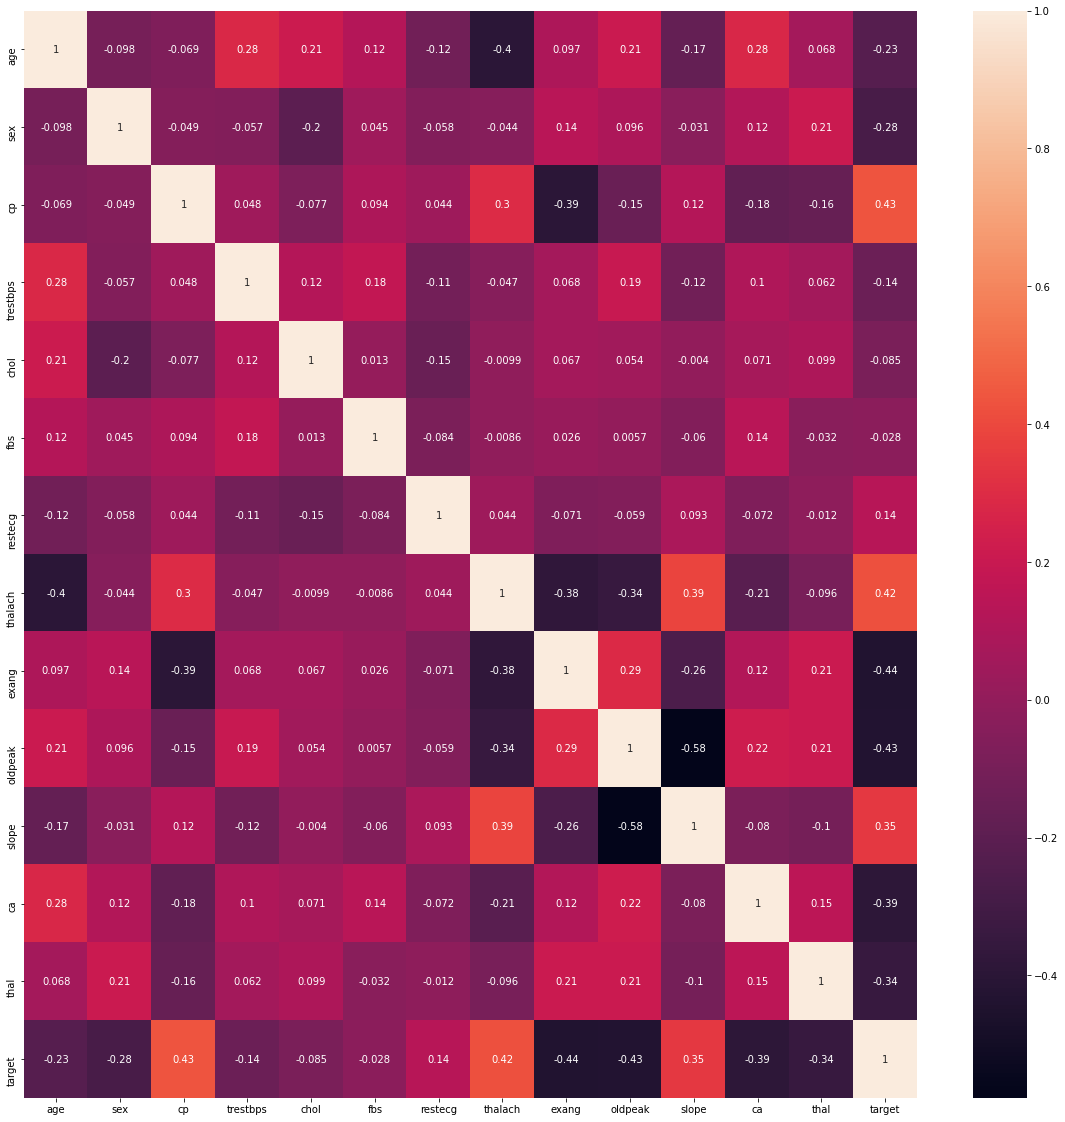

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(cor_matrix,annot=True)#cmap-list of colors for heatmap to display

Correlation matrix shows us the relation between any two features and how they strongly they can vary upon changing other variable.
From above graph we can see:


*   Target is moderately correlated with all features
*   Target is least correlated with fbs and that too it is negatively correlated
*   Target is highly correlated with exang than other features 



  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7185cafd10>,
      dtype=object)

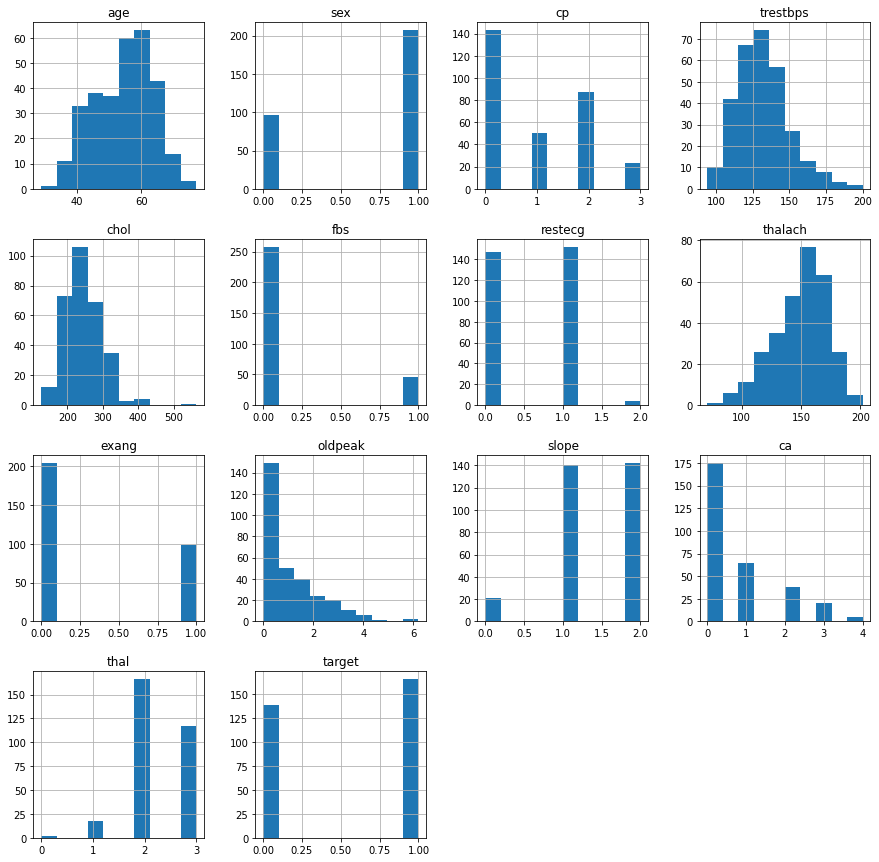

In [9]:
plt.figure(figsize=(15,15))
ax=plt.gca()
df.hist(ax=ax)
## this shows us only distribution of data ...data in column and its frequency

In [10]:
df[['cp','target']].groupby('cp').mean()

,target
cp,
0,0.272727
1,0.820000
2,0.793103
3,0.695652


In [11]:
df.groupby('cp').target.mean()

cp
0    0.272727
1    0.820000
2    0.793103
3    0.695652
Name: target, dtype: float64

**Graphs show important things in Simple Way and are easily understood.
So,let us see some insights from graphs**

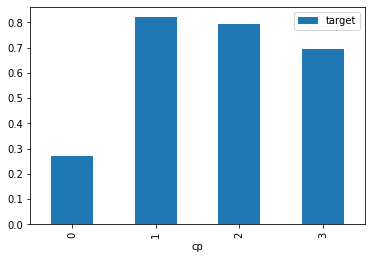

In [12]:
df[['cp','target']].groupby('cp').mean().plot(kind='bar')


* The above graph tells us cp type-1 persons have high probability to get heart disease
* order of Probability to get heart disease given cp type is-Type-1>Type-2>Type-3>Type-0

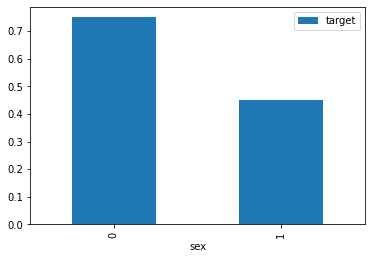

In [13]:
df[['sex','target']].groupby('sex').mean().plot(kind='bar')

0-female,1-male as mentioned in data set
*  Females have higher risk of having Heart Disease than males.
* 73%  of Females  are having risk of  Heart Disease
* 45% of Males are at risk of getting  Heart Disease

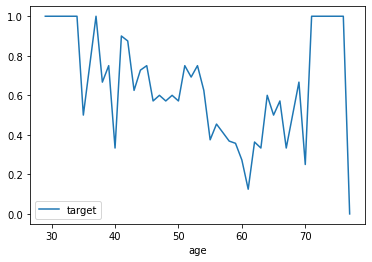

In [14]:
df[['age','target']].groupby('age').mean().plot(kind='line')
## to see the risk of getting heart disease 

People of age group between 35-55 and those around 70's have higher chances of getting Heart Disease

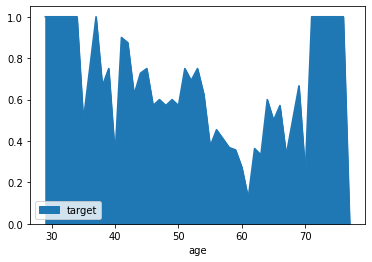

In [15]:
df[['age','target']].groupby('age').mean().plot(kind='area')
# tried to learn area plots 

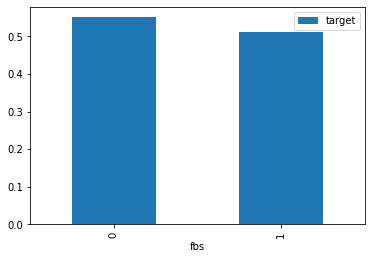

In [16]:
df[['fbs','target']].groupby('fbs').mean().plot(kind='bar')
#fbs-fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

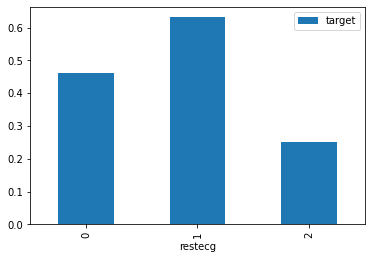

In [17]:
df[['restecg','target']].groupby('restecg').mean().plot(kind='bar')#0-normal 1-having st-t 2-hypertrophy

People having restecg of type 1 have got more chances of HeartDisease with followed by Type-0 and Type-2.

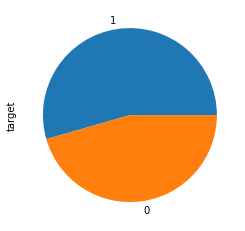

In [18]:
df.target.value_counts().plot(kind='pie')
## balanced data set since composition of both the target 0 and 1 are almost equal.

In [19]:
df.groupby('cp').target.mean()

cp
0    0.272727
1    0.820000
2    0.793103
3    0.695652
Name: target, dtype: float64

In [20]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [21]:
##observations to made here regarding distribution
## regarding imbalanced and balanced data set also
##gridsearch cv
## 

In [ ]:
## let us scale down features 

In [22]:
df.cp.unique()

array([3, 2, 1, 0])

In [23]:
df.fbs.unique()

array([1, 0])

In [24]:
df.restecg.unique()#0-normal 1-having st-t 2-hypertrophy

array([0, 1, 2])

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
col=[]
for i in df.columns:
    if(i!="target"):
     col.append(i)
df[col]=sc.fit_transform(df[col])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1


In [27]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [28]:
y=np.array(df['target'])
x=np.array(df.drop(['target'],axis=1))

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [30]:
x_train.shape

(242, 13)

In [31]:
x_test.shape

(61, 13)

* random forest classifier
* logistic regression
* svc

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
grid_para={
    'n_estimators': [10,20,40,60,80,100,120,150,180,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grfc=GridSearchCV(estimator=rfc,param_grid=grid_para,cv=8)


In [33]:
grfc.fit(x_train,y_train)

GridSearchCV(cv=8, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [34]:
grfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 80}

In [35]:
grfc.best_score_

0.868010752688172

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
rfc1=RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt',n_estimators=60)
rfc1.fit(x_train,y_train)
y_pred=rfc1.predict(x_test)
accuracy_score(y_test,y_pred)

0.7868852459016393

In [38]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc1,x,y,cv=6)
score.mean()

0.8216339869281045

In [39]:
lg=LogisticRegression()
grid_para2=[{
    'penalty':['l2'],
    'C':[0.1,0.2,0.3,0.5,0.7,0.8,1],
    'max_iter':[20,40,60,80,100,200,400,600,800]
             },
             {
      'penalty':['l1','elasticnet','none'],
      'C':[0.1,0.2,0.3,0.5,0.7,0.8,1],
      'max_iter':[20,40,60,80,100,200,400,600,800] }
]
grfc2=GridSearchCV(estimator=lg,param_grid=grid_para2,cv=8)
grfc2.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio 

GridSearchCV(cv=8, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1],
                          'max_iter': [20, 40, 60, 80, 100, 200, 400, 600, 800],
                          'penalty': ['l2']},
                         {'C': [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1],
                          'max_iter': [20, 40, 60, 80, 100, 200, 400, 600, 800],
            

In [40]:
grfc2.best_params_

{'C': 0.5, 'max_iter': 20, 'penalty': 'l2'}

In [41]:
grfc2.best_score_

0.8471774193548387

In [42]:
lg2=LogisticRegression(C=0.5,max_iter=20,penalty='l2')

In [43]:
lg2.fit(x_train,y_train)
y_pred2=lg2.predict(x_test)
accuracy_score(y_test,y_pred2)

0.7704918032786885

In [44]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lg2,x,y,cv=6)
score.mean()

0.8281699346405228

In [45]:
svc=SVC()

In [46]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grfc3 = GridSearchCV(estimator=svc,param_grid=parameters,cv=5)
grfc3 = grfc3.fit(x_train, y_train)

In [47]:
grfc3.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [48]:
grfc3.best_score_

0.8391156462585034

In [49]:
svc2=SVC(C=1,gamma=0.1,kernel='rbf')

In [50]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(svc2,x,y,cv=6)
score.mean()

0.8247058823529412

In [51]:
svc2.fit(x_train,y_train)
y_pred3=svc2.predict(x_test)
accuracy_score(y_test,y_pred3)

0.7704918032786885

In [ ]:
##Hence Random Forest Classifier worked well rather than other ml models acheiving higher accuracy